In [ ]:
#loading dataset
import pandas as pd
df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\heart.csv')
print (df.head())

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\chauh\AppData\Local\Temp\ipykernel_20464\2577646693.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('D:\study\elevatelabs_aiml_intership\datasets\heart.csv')


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [ ]:
# training the decesion tree 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Accuracy
y_pred = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))


Decision Tree Accuracy: 0.9707792207792207


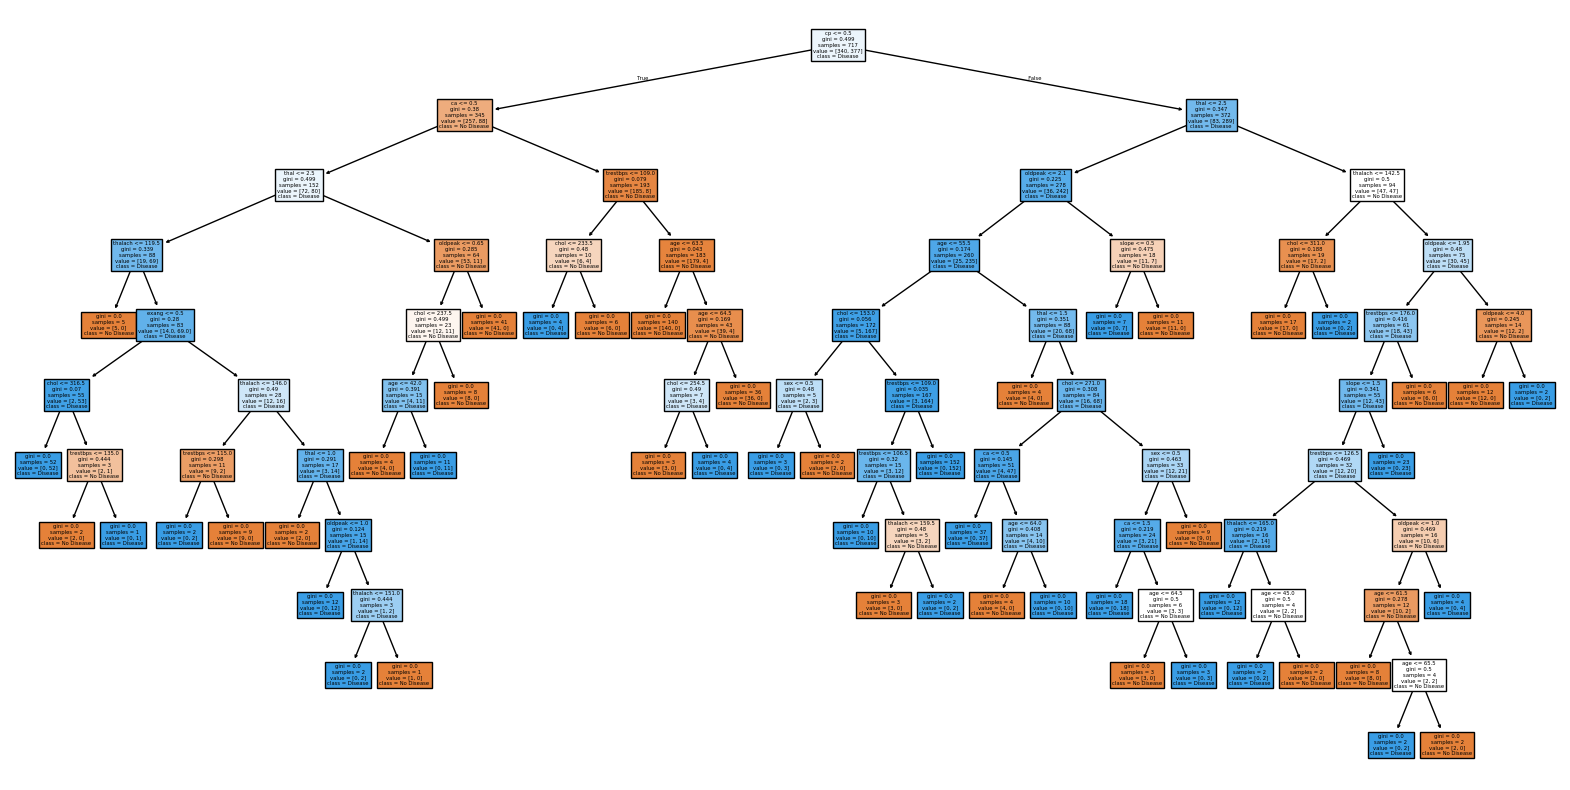

In [ ]:
# visualization of tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()


In [ ]:
# Evaluating overfit and control depth
dtree_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_pruned.fit(X_train, y_train)
print("Pruned Tree Accuracy:", accuracy_score(y_test, dtree_pruned.predict(X_test)))


Pruned Tree Accuracy: 0.8051948051948052


In [ ]:
# training a random forest for comparision
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)

print("Random Forest Accuracy:", accuracy_score(y_test, rforest.predict(X_test)))


Random Forest Accuracy: 0.9805194805194806


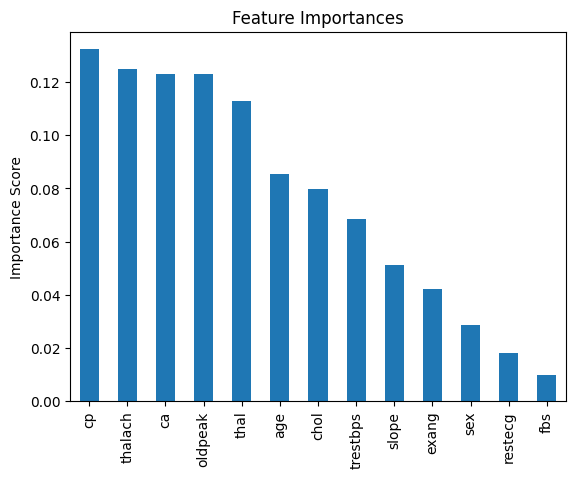

In [ ]:
#feature importance
importances = rforest.feature_importances_
features = pd.Series(importances, index=X.columns).sort_values(ascending=False)
#plotting
features.plot(kind='bar', title='Feature Importances')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rforest, X, y, cv=5)
print("Cross-Validation Accuracy Scores:", scores)
print("Mean Accuracy:", scores.mean())


Cross-Validation Accuracy Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9970731707317073
